In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
class SimplePerceptron:
    def __init__(self, learning_rate=0.1):
        self.weights = np.random.rand(3) * 2 - 1  # 두 입력 + 편향을 위한 가중치
        self.learning_rate = learning_rate
        self.weights_history = [self.weights.copy()]

    def predict(self, inputs):
        # y = w * x + b
        #   inputs      = x
        #   weights[1:] = w
        #   weights[0]  = b
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels, epochs):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                self.weights_history.append(self.weights.copy())

def plot_decision_boundary(idx, weights, ax, label=None):
    x_values = np.array([0, 1])
    y_values = -(weights[0] / weights[2]) - (weights[1] / weights[2]) * x_values

    #
    c1 = 255 - idx * 3
    c2 = 255 - idx * 3
    c3 = 255 - idx * 3

    #
    if idx % 8 == 0:
        c1s = '00'
        c2s = '00'
        c3s = '00'
    elif idx % 8 == 1:
        c1s = '%02x' %(c1)
        c2s = '00'
        c3s = '00'
    elif idx % 8 == 2:
        c1s = '00'
        c2s = '%02x' %(c2)
        c3s = '00'
    elif idx % 8 == 3:
        c1s = '00'
        c2s = '00'
        c3s = '%02x' %(c3)
    elif idx % 8 == 4:
        c1s = '%02x' %(c1)
        c2s = '%02x' %(c2)
        c3s = '00'
    elif idx % 8 == 5:
        c1s = '%02x' %(c1)
        c2s = '00'
        c3s = '%02x' %(c3)
    elif idx % 8 == 6:
        c1s = '00'
        c2s = '%02x' %(c2)
        c3s = '%02x' %(c3)
    elif idx % 8 == 7:
        c1s = '%02x' %(c1)
        c2s = '%02x' %(c2)
        c3s = '%02x' %(c3)
    
    color = f'#{c1s}{c2s}{c3s}'
    print(f'idx = {idx}, color = {color}')

    #
    ax.plot(x_values, y_values, label=label, c=color)


idx = 0, color = #000000
idx = 1, color = #fc0000
idx = 2, color = #00f900
idx = 3, color = #0000f6
idx = 4, color = #f3f300
idx = 5, color = #f000f0
idx = 6, color = #00eded
idx = 7, color = #eaeaea
idx = 8, color = #000000
idx = 9, color = #e40000
idx = 10, color = #00e100
idx = 11, color = #0000de
idx = 12, color = #dbdb00
idx = 13, color = #d800d8
idx = 14, color = #00d5d5
idx = 15, color = #d2d2d2
idx = 16, color = #000000


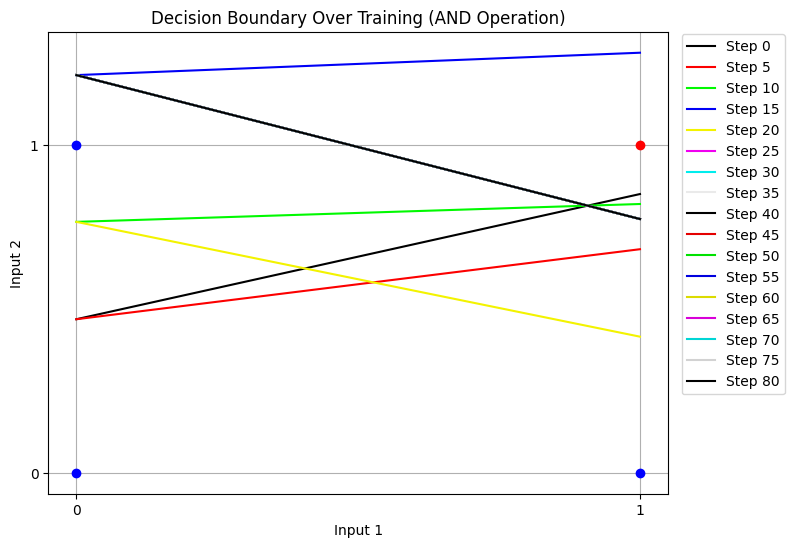

In [14]:
# AND 게이트 훈련 데이터 및 레이블
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

# 퍼셉트론 생성 및 학습
perceptron = SimplePerceptron()
perceptron.train(training_inputs, labels, epochs=20)

# 시각화
plt.figure(figsize=(8, 6))
ax = plt.gca()

# 입력 데이터 플로팅
for i, input in enumerate(training_inputs):
    if labels[i] == 1:
        plt.plot(input[0], input[1], 'ro')
    else:
        plt.plot(input[0], input[1], 'bo')

# 학습 과정에서 결정 경계 플로팅
for i in range(0, len(perceptron.weights_history), 5):
    plot_decision_boundary(i // 5, perceptron.weights_history[i], ax, label=f"Step {i}")

plt.title("Decision Boundary Over Training (AND Operation)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.2))
plt.grid(True)
plt.show()



idx = 0, color = #000000
idx = 1, color = #fc0000
idx = 2, color = #00f900
idx = 3, color = #0000f6
idx = 4, color = #f3f300
idx = 5, color = #f000f0
idx = 6, color = #00eded
idx = 7, color = #eaeaea
idx = 8, color = #000000
idx = 9, color = #e40000
idx = 10, color = #00e100
idx = 11, color = #0000de
idx = 12, color = #dbdb00
idx = 13, color = #d800d8
idx = 14, color = #00d5d5
idx = 15, color = #d2d2d2
idx = 16, color = #000000


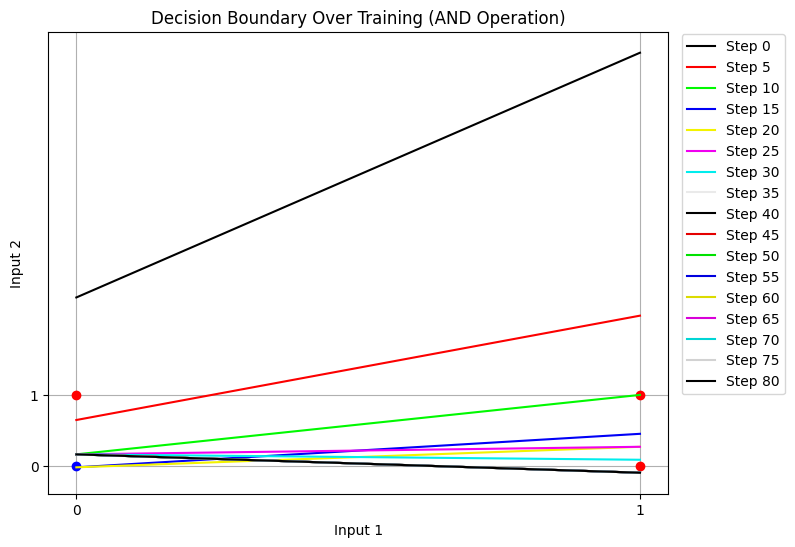

In [19]:
# AND 게이트 훈련 데이터 및 레이블
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])

# 퍼셉트론 생성 및 학습
perceptron = SimplePerceptron()
perceptron.train(training_inputs, labels, epochs=20)

# 시각화
plt.figure(figsize=(8, 6))
ax = plt.gca()

# 입력 데이터 플로팅
for i, input in enumerate(training_inputs):
    if labels[i] == 1:
        plt.plot(input[0], input[1], 'ro')
    else:
        plt.plot(input[0], input[1], 'bo')

# 학습 과정에서 결정 경계 플로팅
for i in range(0, len(perceptron.weights_history), 5):
    plot_decision_boundary(i // 5, perceptron.weights_history[i], ax, label=f"Step {i}")

plt.title("Decision Boundary Over Training (AND Operation)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.2))
plt.grid(True)
plt.show()

